# Data Analysis for Employees Table

## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2
import matplotlib.pyplot as plt
import sys

### Database Connection

In [4]:
def connect_to_DB():
    connection = psycopg2.connect(user = 'postgres',password = 'ashu',
                                 host = 'localhost',port= 5432,database= 'employee_db')
    return connection

In [5]:
conn = connect_to_DB()

## 1. Check for data inconsistency.

### Department dataframe

In [7]:
department_df = pd.read_sql_query("SELECT * FROM employees.department",conn )

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\1894723660.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_df = pd.read_sql_query("SELECT * FROM employees.department",conn )


In [8]:
department_df

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


### Checking department data inconsistency 

In [9]:
department_df.info()
print(department_df.columns)
print(department_df.shape)
sys.getsizeof(department_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9 non-null      object
 1   dept_name  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes
Index(['id', 'dept_name'], dtype='object')
(9, 2)


1325

In [10]:
department_df.describe(include='all')

,id,dept_name
count,9,9
unique,9,9
top,d001,Marketing
freq,1,1


### Department employee dataframe

In [11]:
demp_df = pd.read_sql_query("SELECT * FROM employees.department_employee",conn )

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\239546998.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demp_df = pd.read_sql_query("SELECT * FROM employees.department_employee",conn )


In [12]:
demp_df

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


### Checking department employee data inconsistency

In [13]:
demp_df.info()
print(demp_df.columns)
print(demp_df.shape)
sys.getsizeof(demp_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   employee_id    331603 non-null  int64 
 1   department_id  331603 non-null  object
 2   from_date      331603 non-null  object
 3   to_date        331603 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.1+ MB
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')
(331603, 4)


49409011

In [14]:
demp_df.describe(include='all')

,employee_id,department_id,from_date,to_date
count,331603.000000,331603,331603,331603
unique,NaN,9,6393,6085
top,NaN,d005,1990-12-28,9999-01-01
freq,NaN,85707,91,240124
mean,253332.605025,NaN,NaN,NaN
std,161831.919445,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,85005.500000,NaN,NaN,NaN
50%,250001.000000,NaN,NaN,NaN
75%,424999.500000,NaN,NaN,NaN


In [15]:
demp_df.nunique()

employee_id      300024
department_id         9
from_date          6393
to_date            6085
dtype: int64

In [16]:
demp_df.isna().sum()

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64

### Department manager dataframe

In [17]:
dmgr_df = pd.read_sql_query("SELECT * FROM employees.department_manager",conn )

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\3990811247.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dmgr_df = pd.read_sql_query("SELECT * FROM employees.department_manager",conn )


In [18]:
dmgr_df

,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,9999-01-01


### Checking department manager data inconsistency

In [19]:
dmgr_df.info()
print(dmgr_df.columns)
print(dmgr_df.shape)
sys.getsizeof(dmgr_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    24 non-null     int64 
 1   department_id  24 non-null     object
 2   from_date      24 non-null     object
 3   to_date        24 non-null     object
dtypes: int64(1), object(3)
memory usage: 900.0+ bytes
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')
(24, 4)


3740

In [20]:
dmgr_df.describe(include='all')

,employee_id,department_id,from_date,to_date
count,24.000000,24,24,24
unique,NaN,9,16,16
top,NaN,d004,1985-01-01,9999-01-01
freq,NaN,4,9,9
mean,110780.833333,NaN,NaN,NaN
std,627.958713,NaN,NaN,NaN
min,110022.000000,NaN,NaN,NaN
25%,110284.250000,NaN,NaN,NaN
50%,110646.000000,NaN,NaN,NaN
75%,111199.750000,NaN,NaN,NaN


In [21]:
dmgr_df.nunique()

employee_id      24
department_id     9
from_date        16
to_date          16
dtype: int64

In [22]:
dmgr_df.isna().sum()

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64

### Employee Dataframe 

In [23]:
employee_df = pd.read_sql_query("SELECT * FROM employees.employee",conn )

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\2497738322.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_df = pd.read_sql_query("SELECT * FROM employees.employee",conn )


In [24]:
employee_df 

,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### Checking employee data inconsistency

In [25]:
employee_df.info()
print(employee_df.columns)
print(employee_df.shape)
sys.getsizeof(employee_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
Index(['id', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date'], dtype='object')
(300024, 6)


82017604

In [26]:
#Rows containing duplicated data
duplicate_row_employee = employee_df[employee_df.duplicated()]
print('Number of duplicate rows: ', duplicate_row_employee.shape)

Number of duplicate rows:  (0, 6)


In [27]:
employee_df.count()

id            300024
birth_date    300024
first_name    300024
last_name     300024
gender        300024
hire_date     300024
dtype: int64

In [28]:
employee_df.describe(include='all')

,id,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20
freq,NaN,95,295,226,179973,132
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN
50%,249987.500000,NaN,NaN,NaN,NaN,NaN
75%,424993.250000,NaN,NaN,NaN,NaN,NaN


### Salary Dataframe

In [29]:
salary_df = pd.read_sql_query("SELECT * FROM employees.salary",conn )

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\2142487712.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query("SELECT * FROM employees.salary",conn )


In [30]:
salary_df

,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
1141778,220134,77987,1997-09-02,1998-09-02
1141779,220134,77594,1998-09-02,1999-09-02
1141780,220134,80694,1999-09-02,2000-09-01
1141781,220134,83016,2000-09-01,2001-09-01


In [31]:
salary_df.info()
print(salary_df.columns)
print(salary_df.shape)
sys.getsizeof(salary_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141783 entries, 0 to 1141782
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   employee_id  1141783 non-null  int64 
 1   amount       1141783 non-null  int64 
 2   from_date    1141783 non-null  object
 3   to_date      1141783 non-null  object
dtypes: int64(2), object(2)
memory usage: 34.8+ MB
Index(['employee_id', 'amount', 'from_date', 'to_date'], dtype='object')
(1141783, 4)


109611332

In [32]:
salary_df.nunique()

employee_id    120159
amount          78640
from_date        6392
to_date          6068
dtype: int64

In [33]:
salary_df.isna().sum()

employee_id    0
amount         0
from_date      0
to_date        0
dtype: int64

In [34]:
salary_df.describe(include='all')

,employee_id,amount,from_date,to_date
count,1.141783e+06,1.141783e+06,1141783,1141783
unique,NaN,NaN,6392,6068
top,NaN,NaN,1998-10-25,9999-01-01
freq,NaN,NaN,416,96370
mean,8.516561e+04,6.376120e+04,NaN,NaN
std,6.194662e+04,1.690071e+04,NaN,NaN
min,1.000100e+04,3.873500e+04,NaN,NaN
25%,4.005800e+04,5.045400e+04,NaN,NaN
50%,7.010100e+04,6.109300e+04,NaN,NaN
75%,1.001190e+05,7.412100e+04,NaN,NaN


### Title Dataframe

In [35]:
title_df = pd.read_sql_query("SELECT * FROM employees.title",conn ) 

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\3024409608.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  title_df = pd.read_sql_query("SELECT * FROM employees.title",conn )


In [36]:
title_df

,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [37]:
title_df.info()
print(title_df.columns)
print(title_df.shape)
sys.getsizeof(title_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   employee_id  443308 non-null  int64 
 1   title        443308 non-null  object
 2   from_date    443308 non-null  object
 3   to_date      443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
Index(['employee_id', 'title', 'from_date', 'to_date'], dtype='object')
(443308, 4)


68832305

In [38]:
title_df.nunique()

employee_id    300024
title               7
from_date        6393
to_date          5888
dtype: int64

In [39]:
title_df.isna().sum()

employee_id    0
title          0
from_date      0
to_date        0
dtype: int64

In [40]:
title_df.describe(include='all')

,employee_id,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25,9999-01-01
freq,NaN,115003,132,240124
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN
50%,249847.500000,NaN,NaN,NaN
75%,424891.250000,NaN,NaN,NaN


## 2. Which department has the highest average salary of active employees ? Give some plots to show the avg salary department-wise.


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\3786927818.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_info_all_dept = pd.read_sql_query(query, connection)


  dept_name          avg
8     Sales  88904.88619


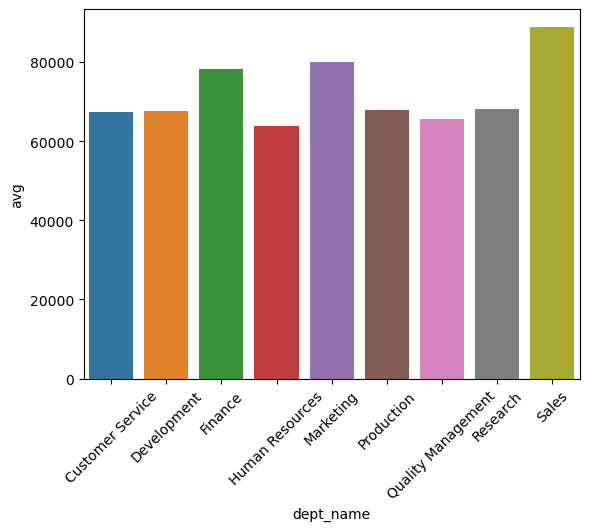

In [65]:
def get_department_wise_avg_salary():
    connection = connect_to_DB()  # Assuming connect_to_DB() is correctly defined in your module
    
    query = """
        SELECT tab1.dept_name, avg(tab1.amount) 
        FROM (
            SELECT de.employee_id, s.amount, d.dept_name
            FROM employees.department_employee AS de
            LEFT JOIN employees.salary AS s ON s.employee_id = de.employee_id 
            LEFT JOIN employees.department AS d ON de.department_id = d.id
            WHERE date_part('year', s.to_date) = 9999 
            AND date_part('year', de.to_date) = 9999
        ) AS tab1
        GROUP BY tab1.dept_name;
    """
    
    salary_info_all_dept = pd.read_sql_query(query, connection)
    my_plot = sns.barplot(x=salary_info_all_dept.dept_name, y=salary_info_all_dept.avg)
    
    for item in my_plot.get_xticklabels():
        item.set_rotation(45)
        
    return salary_info_all_dept[salary_info_all_dept['avg'] == max(salary_info_all_dept['avg'])]

result = get_department_wise_avg_salary()
print(result)

## 3. Which title has the highest avg salary? Give some plots to show the avg salary title-wise.

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\3846511198.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_with_title = pd.read_sql_query(query, conn)


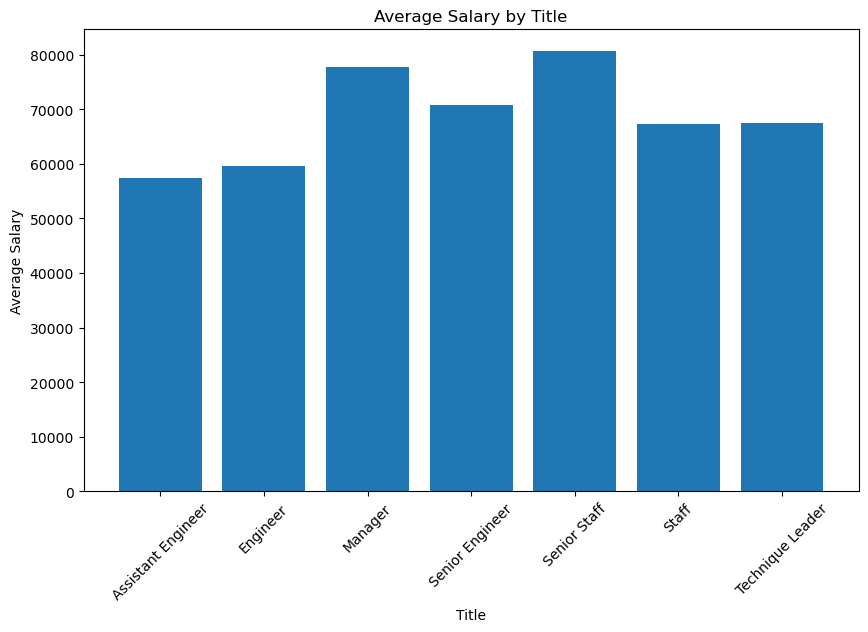

          title    avg_salary
4  Senior Staff  80581.387555


In [50]:
def title_wise_avg_salary():
    conn = connect_to_DB() 

    query = """
        SELECT t.title, AVG(s.amount) AS avg_salary
        FROM employees.employee AS e
        LEFT JOIN employees.title AS t ON t.employee_id = e.id
        LEFT JOIN employees.salary AS s ON s.employee_id = e.id
        WHERE EXTRACT(YEAR FROM s.to_date) = 9999
        AND EXTRACT(YEAR FROM t.to_date) = 9999
        GROUP BY t.title
    """
    avg_salary_with_title = pd.read_sql_query(query, conn)

    plt.figure(figsize=(10, 6))
    plt.bar(avg_salary_with_title.title, avg_salary_with_title.avg_salary)
    plt.xlabel('Title')
    plt.ylabel('Average Salary')
    plt.title('Average Salary by Title')
    plt.xticks(rotation=45)
    plt.show()

    max_avg_salary_row = avg_salary_with_title[avg_salary_with_title['avg_salary'] == avg_salary_with_title['avg_salary'].max()]
    
    return max_avg_salary_row

result = title_wise_avg_salary()
print(result)

## 4. Distribution of salary across titles.

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_15524\1886104783.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_salary_titles = pd.read_sql_query(query, connection)


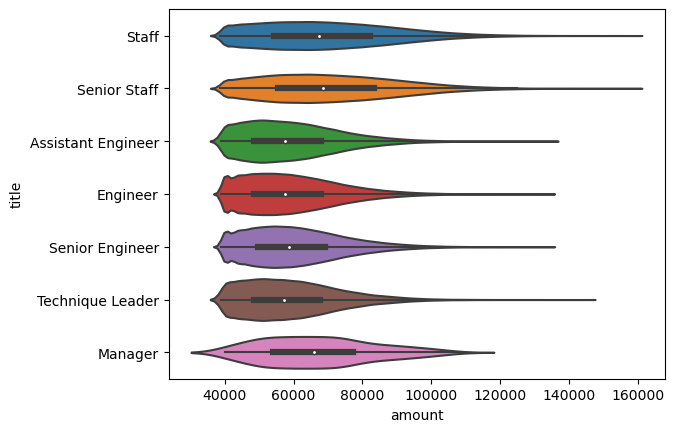

In [20]:
def salary_dist_across_titles():
    connection = connect_to_DB()

    query = """
        SELECT t.title, s.amount
        FROM employees.title t
        INNER JOIN employees.salary s ON t.employee_id = s.employee_id
        ORDER BY s.amount ASC
    """

    all_salary_titles = pd.read_sql_query(query, connection)
    sns.violinplot(data=all_salary_titles, x='amount', y='title')
    plt.show()

# Call the function to execute the query and display the plot
salary_dist_across_titles()

## 5. Distribution of salary across departments.

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_15524\3268015378.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_salary = pd.read_sql_query(query, connection)


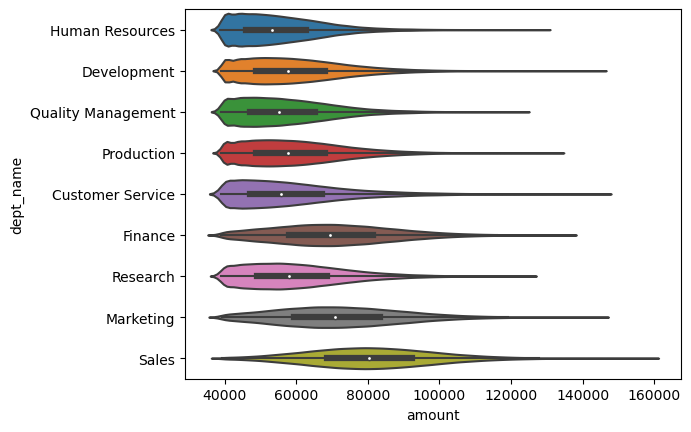

In [12]:
def salary_dist_across_depts():
    connection = connect_to_DB()

    query = """
        SELECT d.dept_name, s.amount
        FROM employees.department d
        INNER JOIN employees.department_employee e ON d.id = e.department_id
        INNER JOIN employees.salary s ON e.employee_id = s.employee_id
    """

    all_salary = pd.read_sql_query(query, connection)
    sns.violinplot(data=all_salary, x='amount', y='dept_name')
    plt.show()

salary_dist_across_depts()

## 6. How many active managers in each department. Is there any department with no manager?

In [7]:
def active_manager_in_department():
    conn = connect_to_DB()
    sql_query="""
    select d.dept_name,t.title,count(dm.department_id)
    from employees.department d
    left join employees.department_manager dm 
    on d.id=dm.department_id
    left join employees.title t
    on dm.employee_id=t.employee_id
    where dm.to_date='9999-01-01' and t.title='Manager'
    group by d.dept_name,t.title

    """

    get_active_manager = pd.read_sql_query(sql_query, conn)
    # Print the counts of active managers in each department
    print("Number of Active Managers in Each Department:")
    print(get_active_manager)
    # SQL query to check for departments with no manager
    department_with_no_mgr = """ select d.dept_name from employees.department d
                                left join employees.department_manager dm on d.id = dm.department_id
                                where dm.employee_id isnull """
    getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)
    # Print whether there are departments with no manager
    if not getdepartment_with_no_manager.empty:
        print("\nDepartments with No Manager:")
        print(departments_without_manager_df)
    else:
        print("\nAll departments have at least one active manager.")

In [8]:
active_manager_in_department()

Number of Active Managers in Each Department:
            dept_name    title  count
0    Customer Service  Manager      1
1         Development  Manager      1
2             Finance  Manager      1
3     Human Resources  Manager      1
4           Marketing  Manager      1
5          Production  Manager      1
6  Quality Management  Manager      1
7            Research  Manager      1
8               Sales  Manager      1

All departments have at least one active manager.


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\2862884233.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_manager = pd.read_sql_query(sql_query, conn)
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\2862884233.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)


## 7. Composition of titles department-wise. Appropriate plots.

In [13]:
def comp_titles_department_wise():
    conn = connect_to_DB()
    
    sql_query="""
    select d.dept_name,t.title,count(d.id), count(*) as title_counts 
    from employees.department_employee e
    join employees.title t
    on e.employee_id=t.employee_id
    join employees.department d
    on e.department_id=d.id
    group by d.dept_name,t.title
    order by d.dept_name asc


    """
    df = pd.read_sql_query(sql_query, conn)
    print(df)
    # Pivot the data for plotting
    pivot_df = df.pivot(index='dept_name', columns='title', values='title_counts').fillna(0)
    # Create a stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.xlabel('Department names')
    plt.ylabel('Number of Employees')
    plt.title('Composition of Titles Department-Wise')
    plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\1540555055.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


             dept_name               title  count  title_counts
0     Customer Service  Assistant Engineer    298           298
1     Customer Service            Engineer   2362          2362
2     Customer Service             Manager      4             4
3     Customer Service     Senior Engineer   2027          2027
4     Customer Service        Senior Staff  13925         13925
5     Customer Service               Staff  16150         16150
6     Customer Service    Technique Leader    309           309
7          Development  Assistant Engineer   7769          7769
8          Development            Engineer  58135         58135
9          Development             Manager      2             2
10         Development     Senior Engineer  49326         49326
11         Development        Senior Staff   1247          1247
12         Development               Staff   1424          1424
13         Development    Technique Leader   7683          7683
14             Finance             Manag

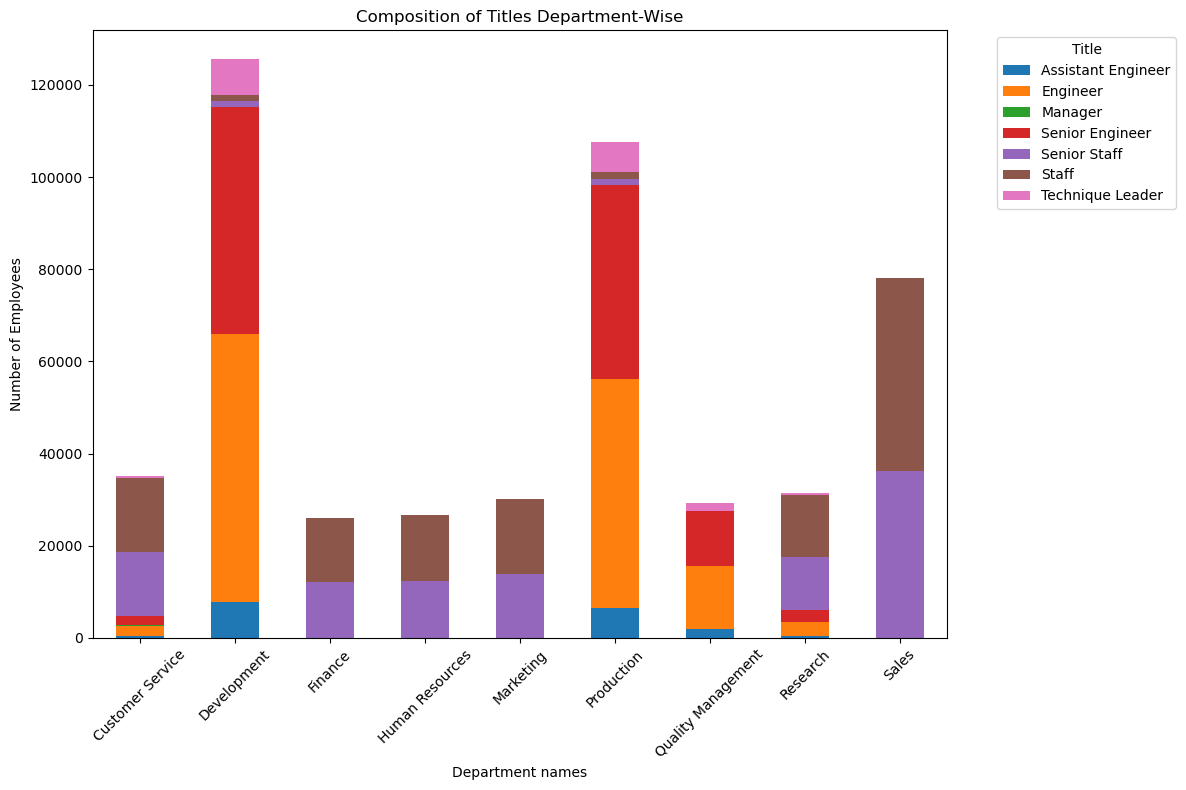

In [14]:
comp_titles_department_wise()

## 8. Composition of departments title-wise. Appropriate plots.

In [17]:
def comp_departments_title_wise():
    conn = connect_to_DB()
    
    sql_query="""
    select count(e.department_id),d.dept_name,t.title, count(*) as title_counts
    from employees.department_employee e
    join employees.department d
    on e.department_id=d.id
    join employees.title t
    on e.employee_id=t.employee_id
    group by d.dept_name,t.title
    order by d.dept_name asc
    """
    df = pd.read_sql_query(sql_query, conn)
    # Pivot the data for plotting
    pivot_df = df.pivot(index='title', columns='dept_name', values='title_counts').fillna(0)

    # Create a stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.xlabel('Titles')
    plt.ylabel('Number of Employees')
    plt.title('Composition of Departments Title-Wise')
    plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\1347376350.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


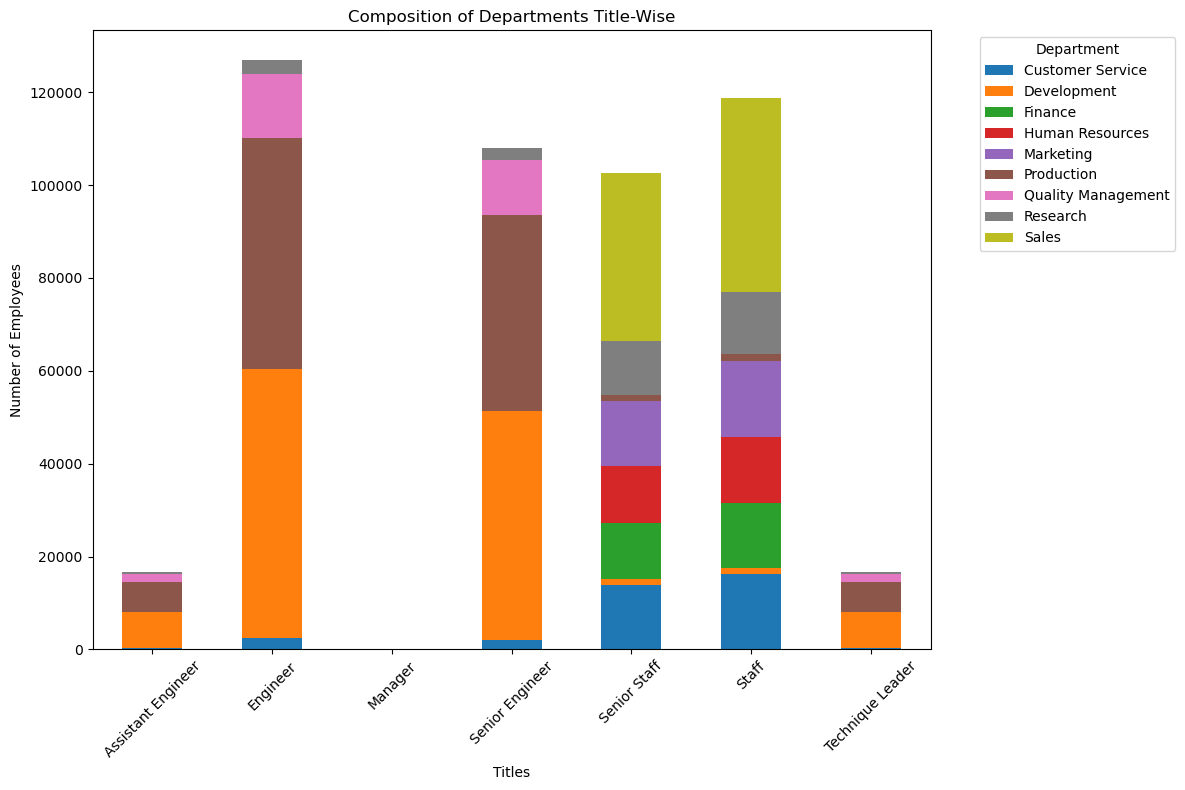

In [18]:
comp_departments_title_wise()

## 9. Salaries of active department managers. Which department's manager who is active earns the most?

In [29]:
def active_dept_manager_salary():
    conn = connect_to_DB()

    sql_query="""
    select d.dept_name,max(s.amount) as sal
    from employees.department d
    left join employees.department_manager dm
    on d.id=dm.department_id
    left join employees.salary s
    on dm.employee_id=s.employee_id
    where dm.to_date='9999-01-01' 
    group by d.dept_name
    order by sal desc
    """
    get_active_manager_salary = pd.read_sql_query(sql_query, conn)
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.xlabel('Department name')
    plt.ylabel('Salary')
    plt.title('Salaries of active department manager')
    sns.barplot(x= get_active_manager_salary['dept_name'], y= get_active_manager_salary['sal'])
    plt.show()
    #for i in plot.get_xticklabels():
        #i.set_rotation(45)
    print('Department manager who is active earns the most')                 
    return get_active_manager_salary[get_active_manager_salary['sal'] == max(get_active_manager_salary['sal'])]

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\2992865689.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_manager_salary = pd.read_sql_query(sql_query, conn)


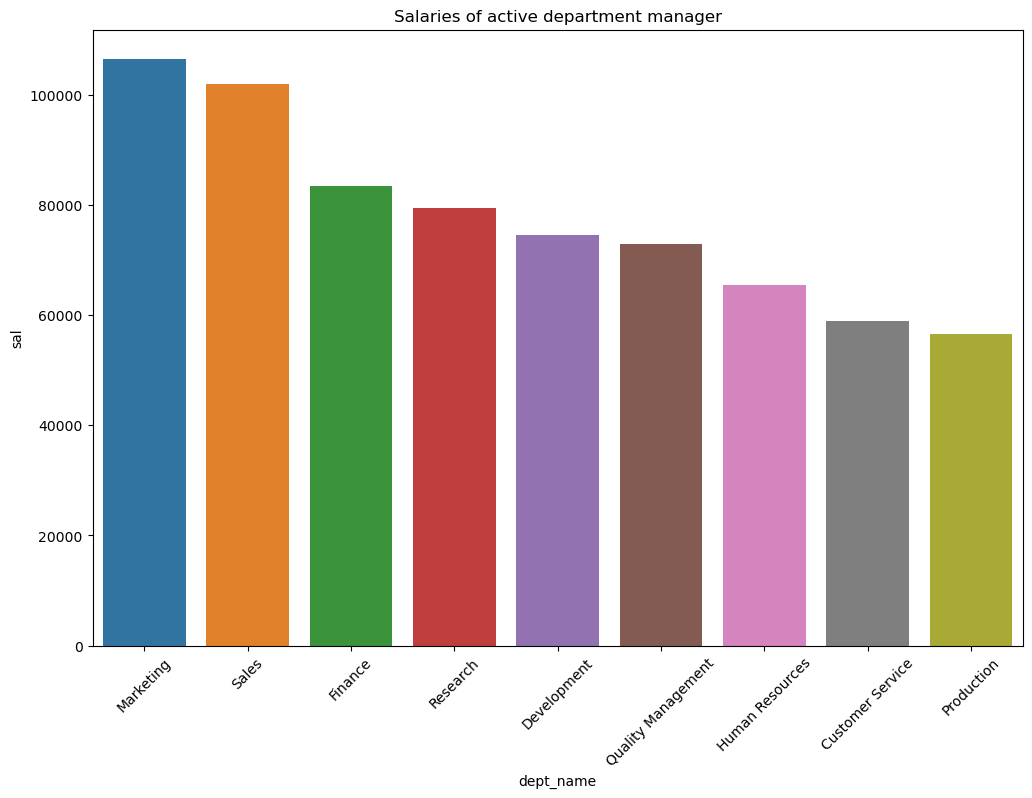

Department manager who is active earns the most


,dept_name,sal
0,Marketing,106491


In [30]:
active_dept_manager_salary()

## 10. What are the titles of active department managers? Are they managers only?

In [55]:
def titles_active_dept_manager():
    conn = connect_to_DB()
    query = """ select d.dept_name, tit.title from employees.department_manager dm
            join employees.title tit on dm.employee_id = tit.employee_id
            join employees.department d on d.id = dm.Department_id
            where date_part('year', dm.to_date) = 9999 and date_part('year', tit.to_date) = 9999 """
    get_active_depmgr_title = pd.read_sql_query(query, conn)
    df = pd.DataFrame(get_active_depmgr_title)
    print(df.head())
    print('Check if there are any titles other than manager : \n')
    only_managers = get_active_depmgr_title['title'].nunique() == 1
    if only_managers:
        print("All active department managers have the title 'manager'.")
    else:
        print("Active department managers have titles other than 'manager' too.")


In [56]:
titles_active_dept_manager()

         dept_name    title
0        Marketing  Manager
1          Finance  Manager
2  Human Resources  Manager
3       Production  Manager
4      Development  Manager
Check if there are any titles other than manager : 

All active department managers have the title 'manager'.


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\1022979148.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_depmgr_title = pd.read_sql_query(query, conn)


## 11. Past history of salaries of managers across department (yearly)

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\1772086109.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df11 = pd.read_sql_query(query, connection)


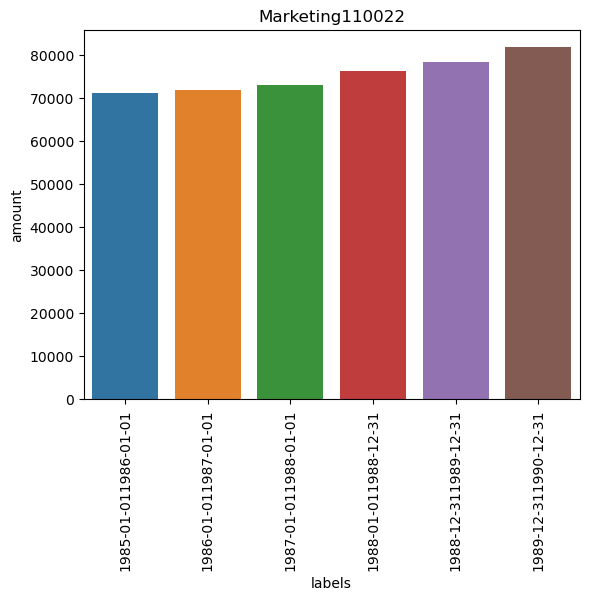

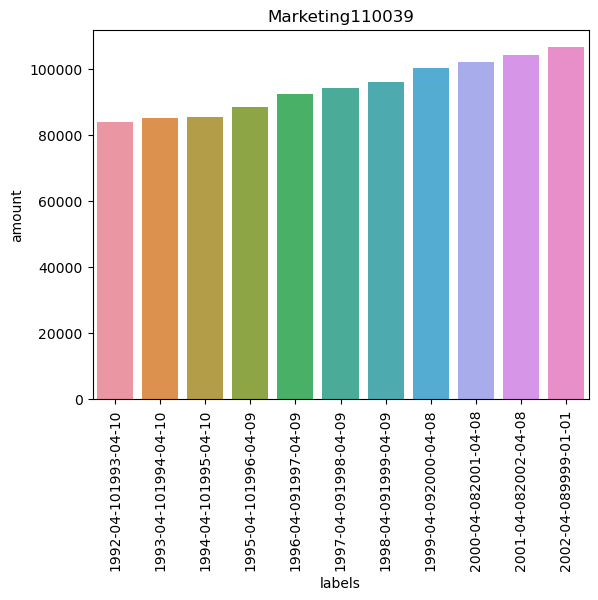

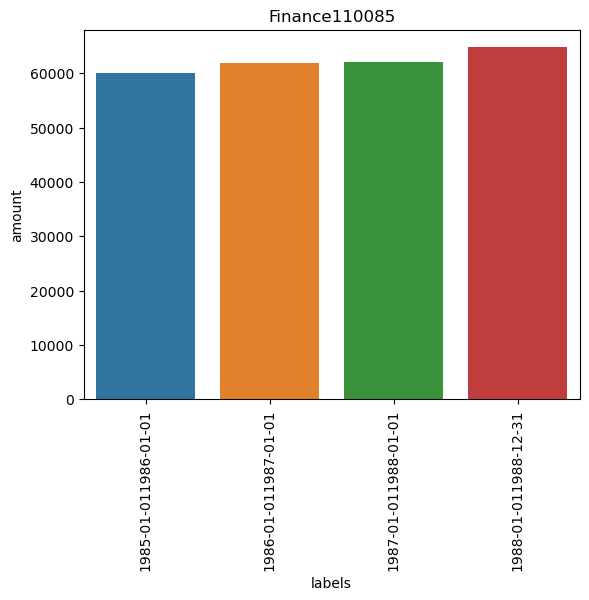

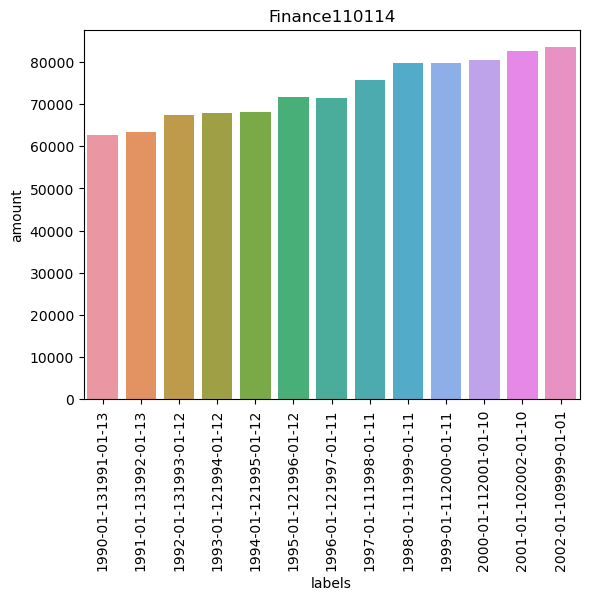

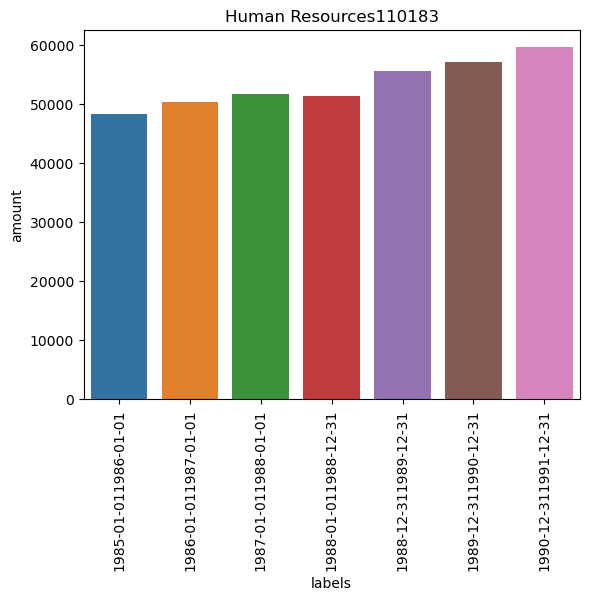

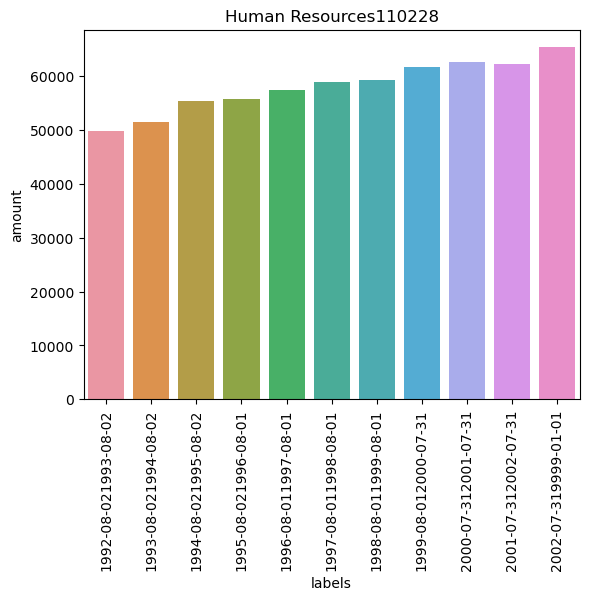

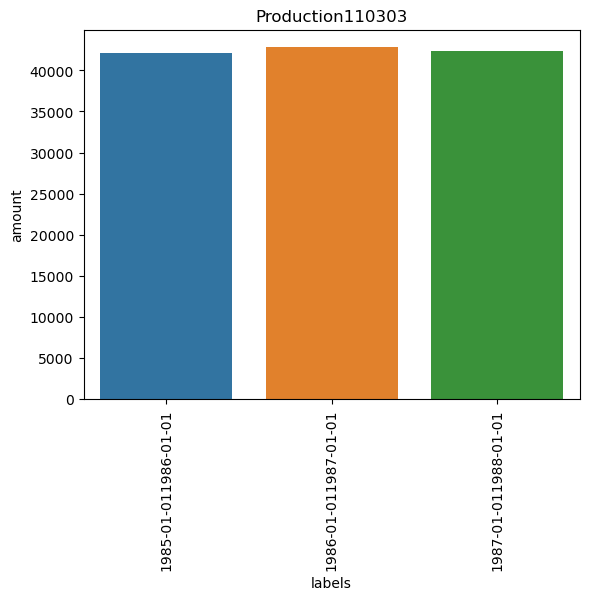

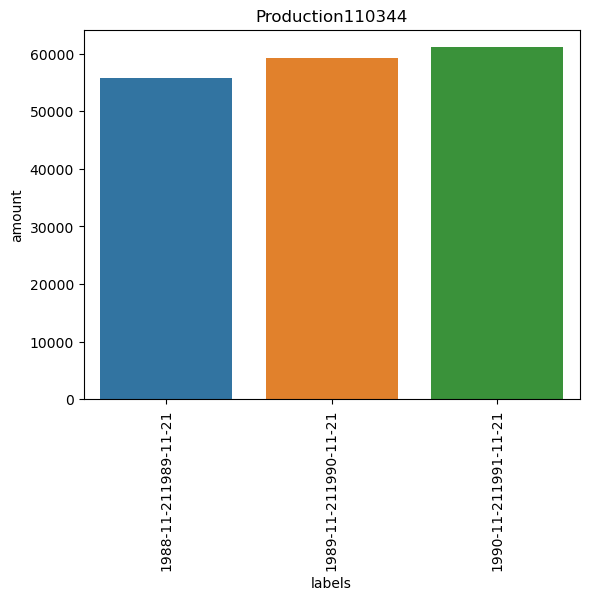

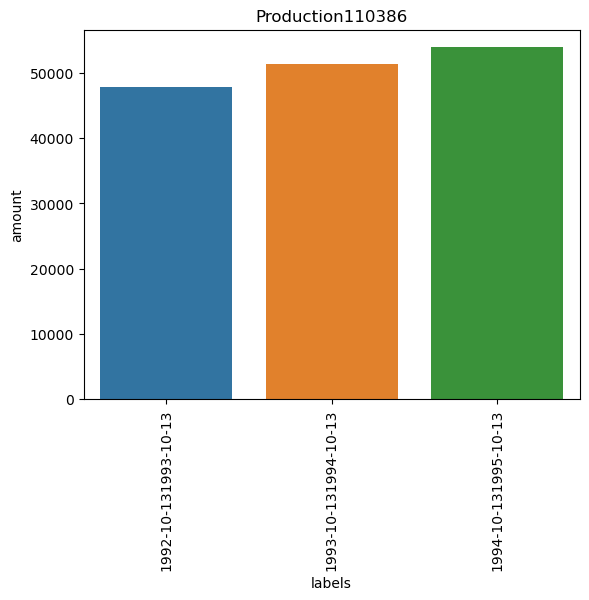

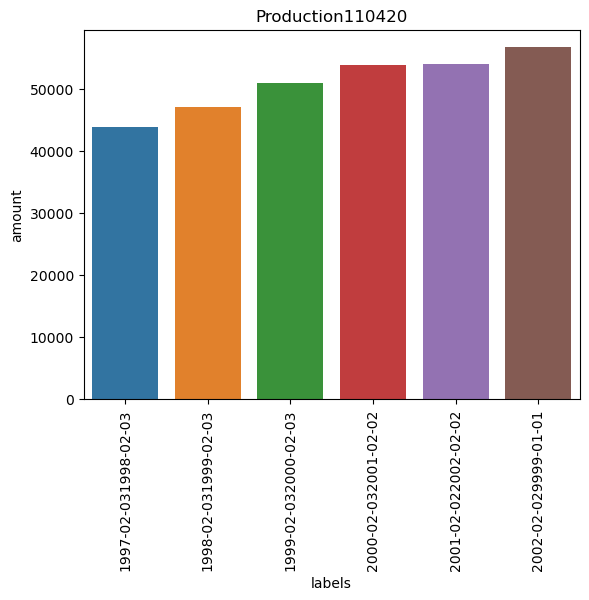

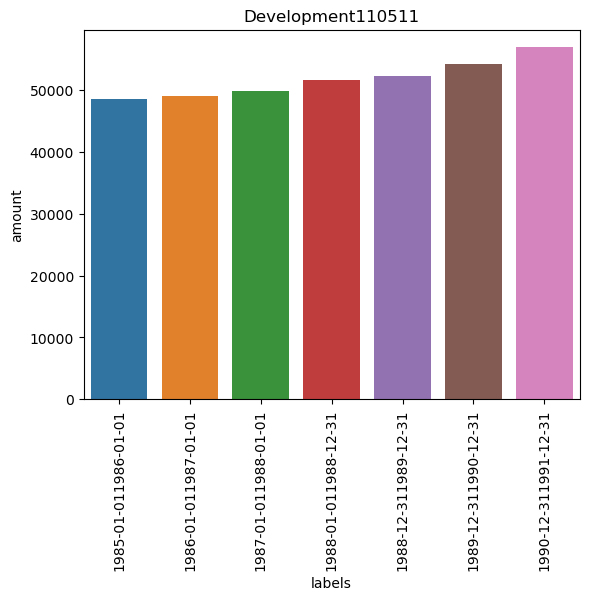

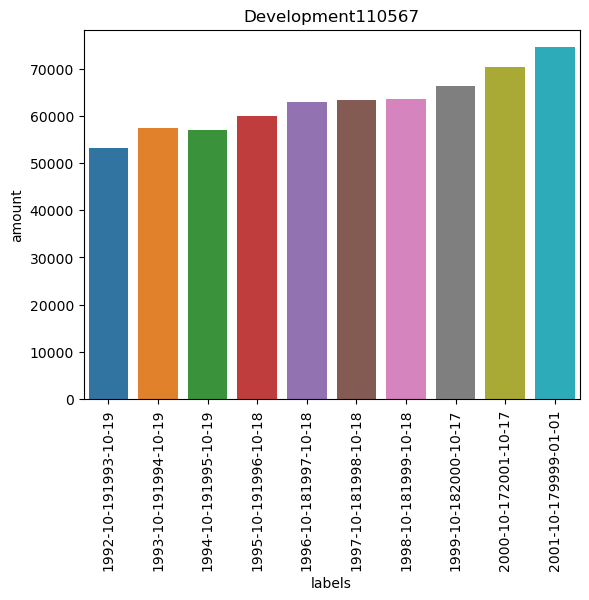

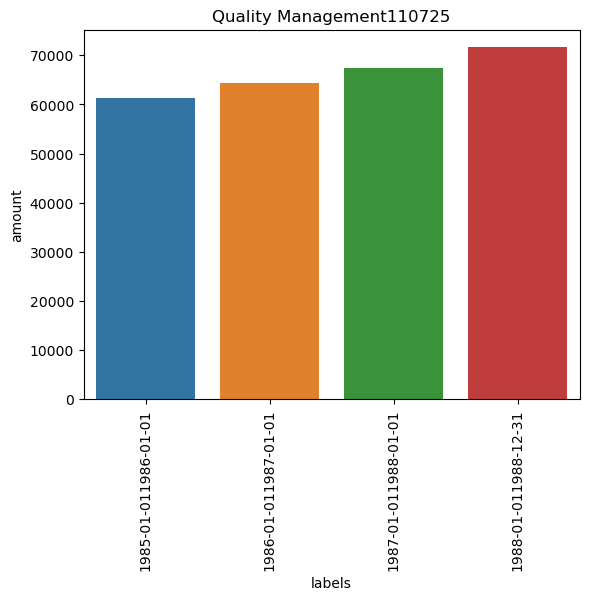

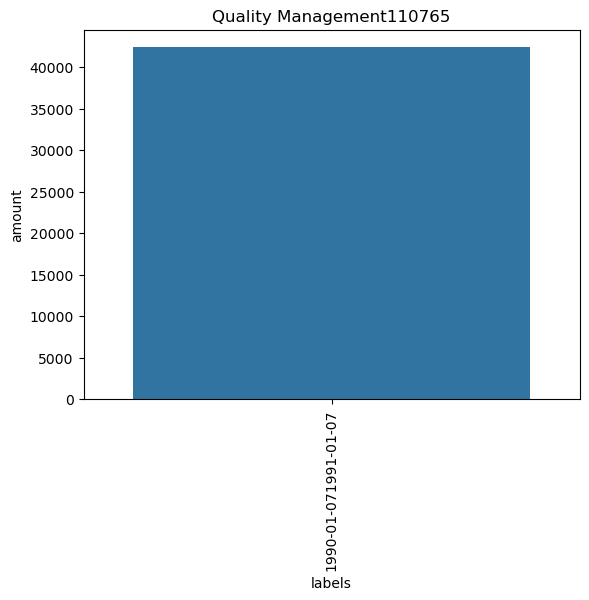

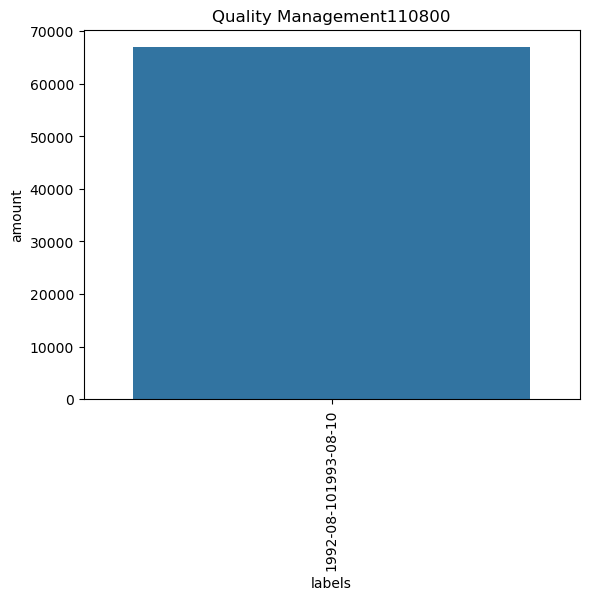

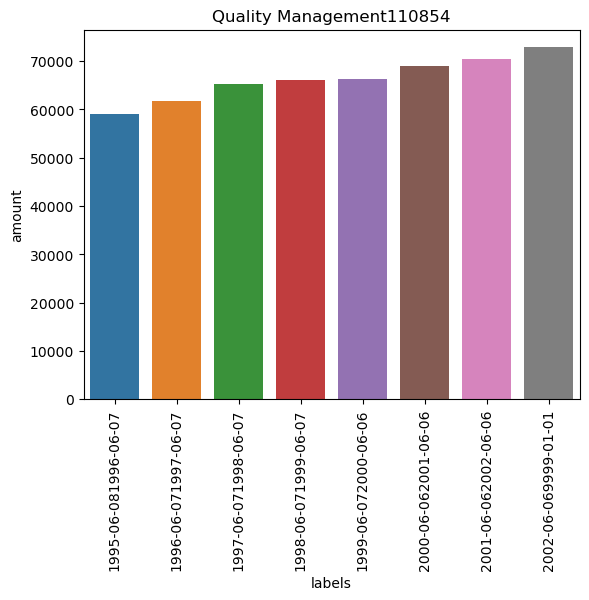

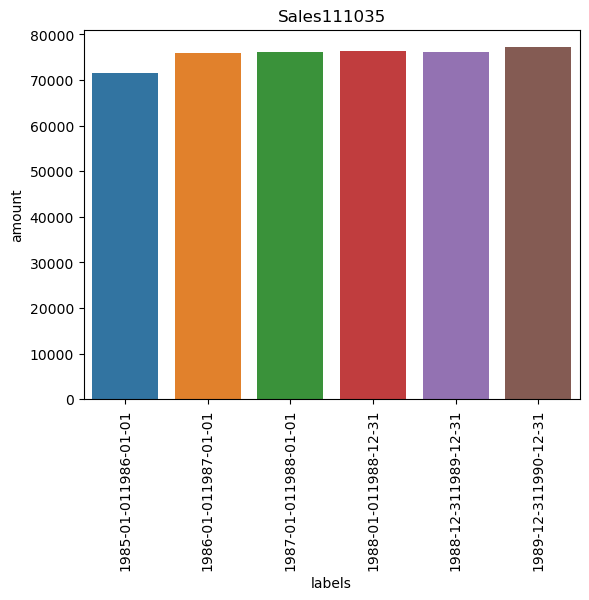

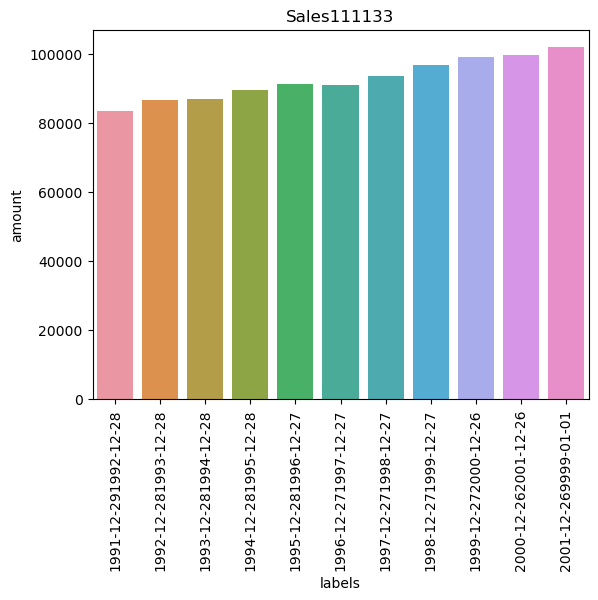

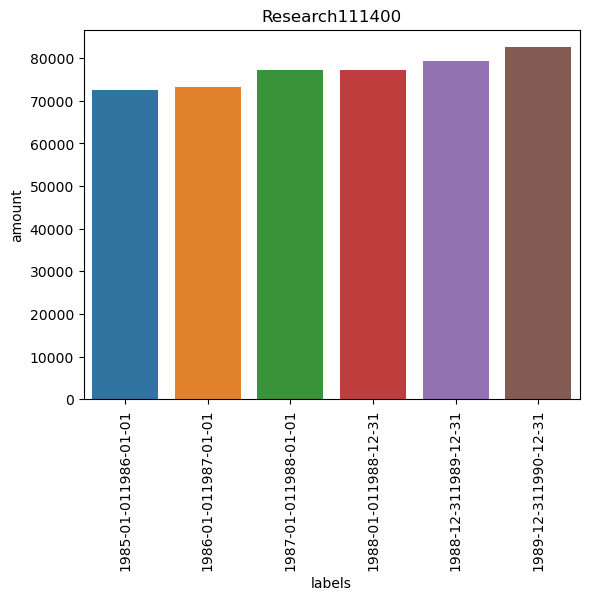

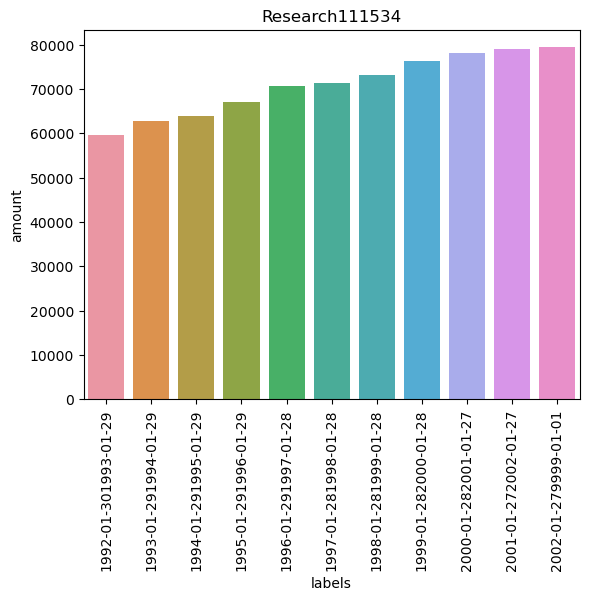

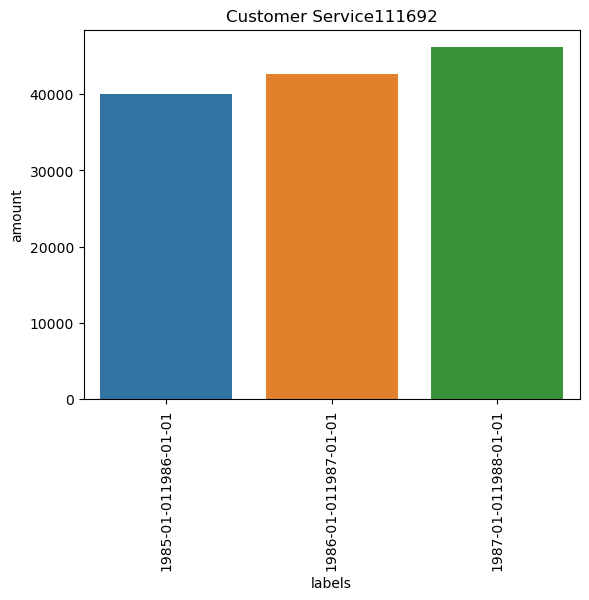

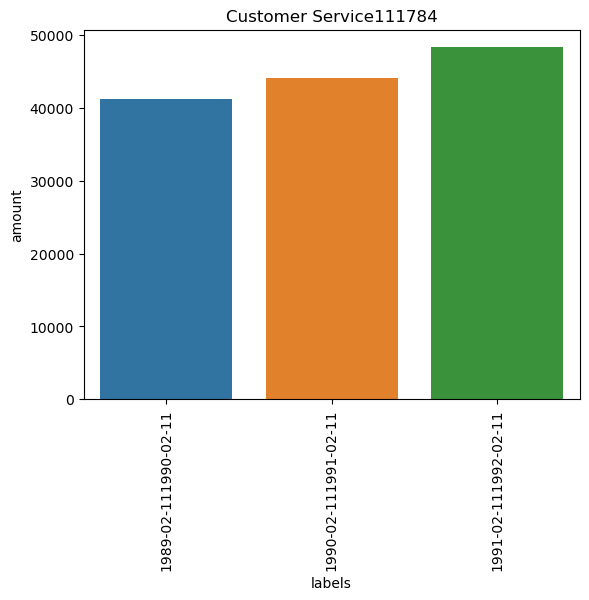

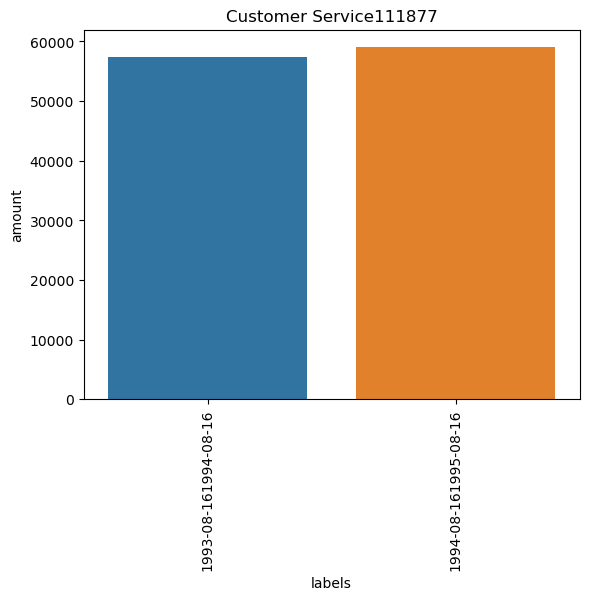

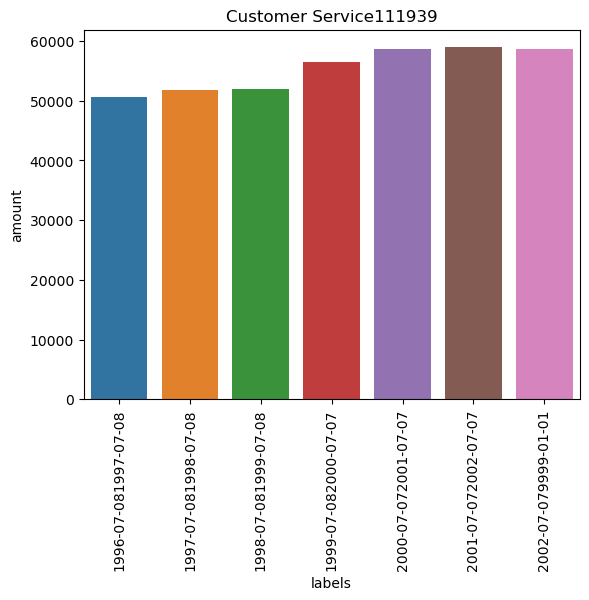

In [71]:
def get_manager_past_salaries_dept_wise():
    connection = connect_to_DB()
    query = """
        SELECT dm.employee_id, d.dept_name, s.amount, s.from_date, s.to_date
        FROM employees.department_manager dm
        JOIN employees.department d ON d.id = dm.department_id
        JOIN employees.salary s ON s.employee_id = dm.employee_id
        WHERE s.from_date >= dm.from_date
        AND s.to_date <= dm.to_date;
    """
    
    df11 = pd.read_sql_query(query, connection)
    df11['labels'] = df11['from_date'].apply(str) + df11['to_date'].apply(str)
    depts = df11['dept_name'].unique()
    employees_manager = df11['employee_id'].unique()
    for i in depts:
        for j in employees_manager:
            new_df11 = df11[(df11['dept_name'] == i) & (df11['employee_id'] == j)]
            if not new_df11.empty:
                my_plot = sns.barplot(x=new_df11['labels'], y=new_df11['amount'])
                for item in my_plot.get_xticklabels():
                    item.set_rotation(90)
                plt.title(i + str(j))
                plt.show()
            else:
                continue


get_manager_past_salaries_dept_wise()

## 12. Distribution of salaries of active employees working for more than 10 years vs 4 years vs 1 year.


In [70]:
def get_salary_dist_expwise():
    conn = connect_to_DB()
    sql_query = """ with active_employee as (
                    select e.id, s.amount as salary, date_part('year', de.to_date) - date_part('year', e.hire_date) as year_of_experience
                    from employees.employee e join employees.department_employee de on e.id = de.employee_id
                    join employees.salary s on e.id = s.employee_id
                    where s.to_date = '9999-01-01' and date_part('year', de.to_date) - date_part('year', e.hire_date) <= 60)
                select 
                    case
                        when year_of_experience > 10 then 'More than 10 years'
                        when year_of_experience > 4 then '4 to 10 years'
                        when year_of_experience >= 1 then ' 1 to 4 years'
                        else 'Less than 1 year experience'
                    end as service_category,
                    salary
                from active_employee  """
    df = pd.read_sql_query(sql_query, conn)
    print(df.head())
    # Create a histogram to visualize the salary distribution for each service category
    plt.figure(figsize=(12, 8))
    for category, data in df.groupby('service_category'):
        plt.hist(data['salary'], bins=20, alpha=0.7, label=category)

    plt.xlabel('salary')
    plt.ylabel('Frequency')
    plt.title('Salary Distribution of Active Employees by Years of Service')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\3622058643.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


     service_category  salary
0  More than 10 years   80324
1       4 to 10 years   84672
2  More than 10 years   77777
3       4 to 10 years   72668
4        1 to 4 years   97830


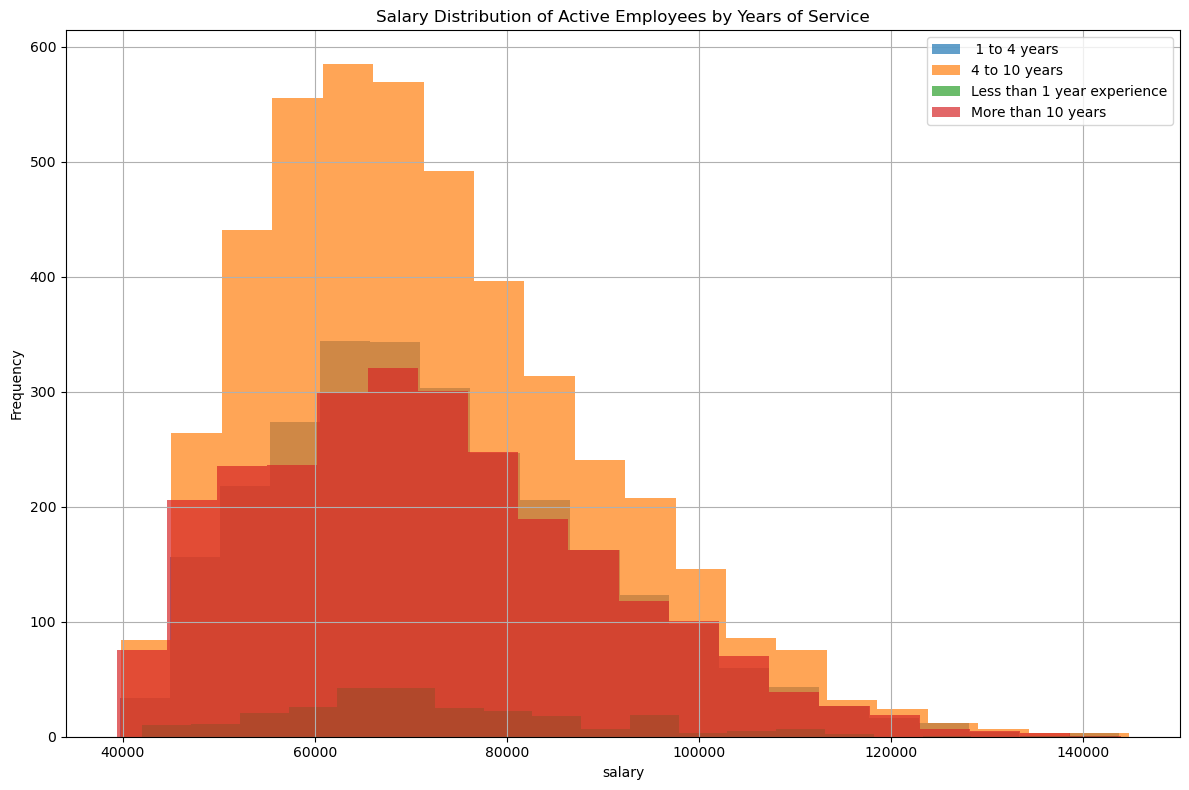

In [71]:
get_salary_dist_expwise()

## 13. Average number of years employees work in the company before leaving (title wise).

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_16868\301068184.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df13 = pd.read_sql_query(query, connection)


dept_name
Customer Service      4.230245
Development           4.641462
Finance               4.652882
Human Resources       4.611293
Marketing             4.275470
Production            4.511917
Quality Management    4.363849
Research              4.347581
Sales                 4.611111
Name: span, dtype: float64


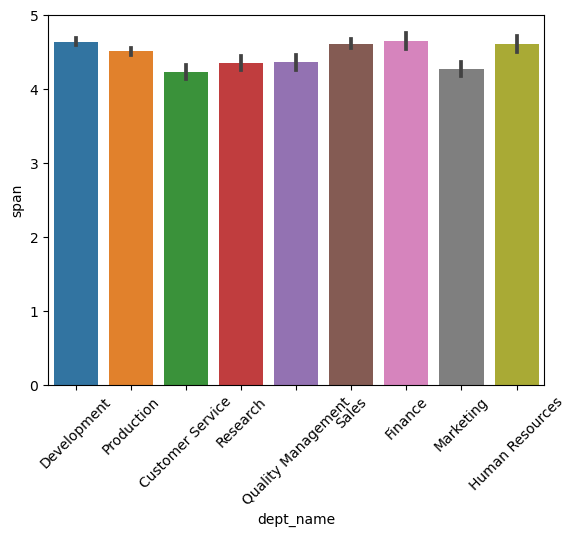

In [60]:
def avg_years_in_company_department_wise():
    connection = connect_to_DB()  # Assuming connect_to_DB() is correctly defined in your module
    
    query = """
        SELECT d.dept_name, 
               date_part('year', de.to_date) AS to_year,
               date_part('year', de.from_date) AS from_year
        FROM employees.department AS d
        JOIN employees.department_employee AS de ON d.id = de.department_id
        WHERE date_part('year', de.to_date) != 9999
    """
    
    df13 = pd.read_sql_query(query, connection)
    df13['span'] = df13['to_year'] - df13['from_year']  # Calculate the span as the difference between to_date and from_date
    df13['span'] = df13['span'].astype('int')
    
    result = df13.groupby('dept_name')['span'].mean()  # Calculate the mean span for each department
    
    plot = sns.barplot(x=df13['dept_name'], y=df13['span'])
    for item in plot.get_xticklabels():
        item.set_rotation(45)

    return result

result = avg_years_in_company_department_wise()
print(result)

## 14. Average number of years employees work in the company before leaving (Dept wise).

In [76]:
def avg_no_of_years_employee_work():
    conn = connect_to_DB()
    sql_query="""
    select count(de.employee_id) as emp_id,d.dept_name,
    avg((date_part('year',de.to_date))-(date_part('year',de.from_date))) as avg_year
    from employees.department d
    join employees.department_employee de on d.id=de.department_id
    where de.to_date!= '9999-01-01'
    group by d.dept_name
    """
    df = pd.read_sql_query(sql_query,conn)
    print(df.head(10))
    # Create a Matplotlib bar plot to visualize the average number of years worked before leaving, department-wise
    plt.figure(figsize=(12, 8))
    plt.barh(df['dept_name'], df['avg_year'], color='skyblue')
    plt.xlabel('Average Years Before Leaving')
    plt.ylabel('Department')
    plt.title('Average Number of Years Employees Worked Before Leaving (Department-Wise)')
    plt.tight_layout()
    plt.show()

   emp_id           dept_name  avg_year
0    6011    Customer Service  4.230245
1   24321         Development  4.641462
2    4909             Finance  4.652882
3    4888     Human Resources  4.611293
4    5369           Marketing  4.275470
5   20181          Production  4.511917
6    5571  Quality Management  4.363849
7    5685            Research  4.347581
8   14544               Sales  4.611111


C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_9052\3642234477.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query,conn)


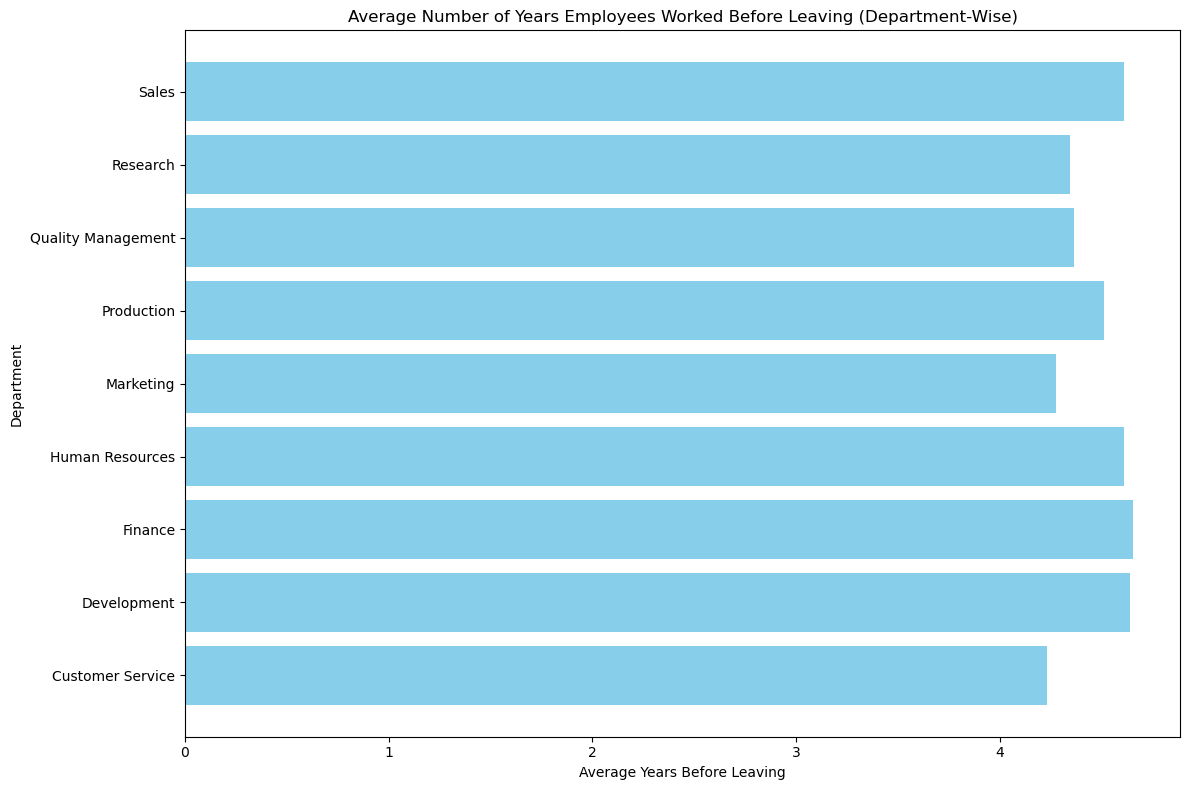

In [77]:
avg_no_of_years_employee_work()

## 15. Median annual salary increment department wise.

In [7]:
def median_salary_incr_deptwise():
    conn = connect_to_DB()
    
    sql_query = """ with salary_increment as 
                    (select d.dept_name, date_part('year', s.from_date) as start, 
                    date_part('year', s.to_date) as end, max(s.amount) - min(s.amount) as annual_increment
                    from employees.department d join employees.department_employee de 
                    on d.id = de.department_id
                    join employees.salary s on de.employee_id =s.employee_id
                    group by d.dept_name, date_part('year', s.from_date), date_part('year', s.to_date))
                select dept_name, percentile_cont(0.5) WITHIN GROUP (ORDER BY annual_increment) as median_annual_salary_increment
                from salary_increment 
                group by dept_name
                order by median_annual_salary_increment """
    
    df = pd.read_sql_query(sql_query, conn)
    print(df)
    # Create a Seaborn bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='median_annual_salary_increment', y='dept_name', data=df, palette='rocket')
    plt.xlabel('Median Annual Salary Increment')
    plt.ylabel('Department')
    plt.title('Median Annual Salary Increment by Department')
    plt.tight_layout()
    plt.show()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_12420\560347963.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


            dept_name  median_annual_salary_increment
0  Quality Management                         57459.0
1     Human Resources                         61356.5
2            Research                         62709.0
3          Production                         65290.0
4         Development                         67305.0
5    Customer Service                         72352.0
6             Finance                         73573.0
7           Marketing                         76386.0
8               Sales                         89566.0


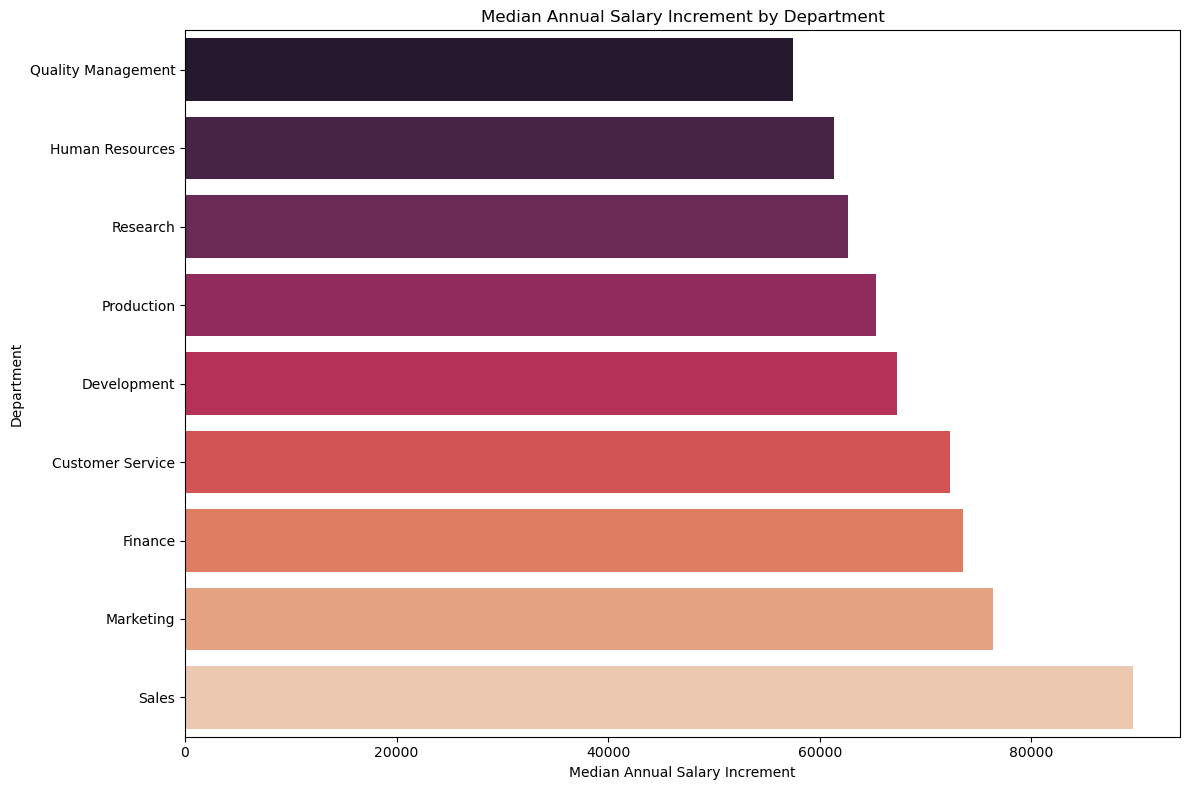

In [8]:
median_salary_incr_deptwise()